# Bank Customer Churn Analysis and Prediction

## Introduction

Customer churn is a critical challenge for banks and financial institutions, as retaining existing customers is often more cost-effective than acquiring new ones. This project aims to analyze the key factors contributing to customer churn using real-world banking data. By applying Exploratory Data Analysis (EDA) and machine learning techniques, we seek to identify patterns and insights that influence customer retention.

## objectives

Customer Churn Analysis – Identifying major factors that lead to customer attrition.

Credit Score Impact on Loans – Evaluating how credit scores affect outstanding loans.

Predictive Modeling – Building a machine learning model to forecast potential customer churn.

- By leveraging data visualization, statistical analysis, and predictive modeling, this project will provide actionable insights to help banks develop better customer retention strategies.

## Load Necessary Library

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ace_tools_open as tools 
import warnings

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

In [157]:
# Data reading by giving path and display values of dataset(first 6 rows)
bank_customer_churn = pd.read_csv("D:/Hochschule Fresenius notes (sem3)/Artifical Intelligence and Machine Learning/Bank_Customer_churn/botswana_bank_customer_churn.csv", delimiter=",")
bank_customer_churn.head()

,RowNumber,CustomerId,Surname,First Name,Date of Birth,Gender,Marital Status,Number of Dependents,Occupation,Income,...,Preferred Communication Channel,Credit Score,Credit History Length,Outstanding Loans,Churn Flag,Churn Reason,Churn Date,Balance,NumOfProducts,NumComplaints
0,1,83ef0b54-35f6-4f84-af58-5653ac0c0dc4,Smith,Troy,1987-08-29,Male,Divorced,3,Information systems manager,77710.14,...,Phone,397,24,41959.74,0,NaN,NaN,211359.05,1,0
1,2,009f115a-e5ca-4cf4-97d6-530140545e4e,Sullivan,Katrina,2000-02-07,Female,Married,1,Charity fundraiser,58209.87,...,Email,665,10,8916.67,0,NaN,NaN,30624.76,4,1
2,3,66309fd3-5009-44d3-a3f7-1657c869d573,Fuller,Henry,1954-02-03,Female,Single,1,Television production assistant,9794.01,...,Email,715,21,43270.54,0,NaN,NaN,111956.61,2,6
3,4,b02a30df-1a5f-4087-8075-2a35432da641,Young,Antonio,1991-01-15,Female,Divorced,5,Agricultural engineer,15088.98,...,Phone,747,17,17887.65,0,NaN,NaN,201187.61,1,0
4,5,0d932e5b-bb3a-4104-8c83-f84270f7f2ea,Andersen,John,1992-04-08,Female,Divorced,2,"Teacher, early years/pre",60726.56,...,Email,549,25,32686.84,0,NaN,NaN,60391.24,5,6


## Buisness questions to be addressed

#### 1. Customer Churn Analysis

Question: What factors contribute to customer churn?

#### 2. Credit Score Impact on Loans

Question: How does a customer's credit score affect their outstanding loans?

## Exploratory Data Analysis (EDA)

#### 1.Summary Statistics

In [158]:
# Display basic information about the dataset
bank_customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115640 entries, 0 to 115639
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   RowNumber                        115640 non-null  int64  
 1   CustomerId                       115640 non-null  object 
 2   Surname                          115640 non-null  object 
 3   First Name                       115640 non-null  object 
 4   Date of Birth                    115640 non-null  object 
 5   Gender                           115640 non-null  object 
 6   Marital Status                   115640 non-null  object 
 7   Number of Dependents             115640 non-null  int64  
 8   Occupation                       115640 non-null  object 
 9   Income                           115640 non-null  float64
 10  Education Level                  115640 non-null  object 
 11  Address                          115640 non-null  object 
 12  Co

In [159]:
# Display summary statistics
print(bank_customer_churn.describe())

           RowNumber  Number of Dependents         Income  Customer Tenure  \
count  115640.000000         115640.000000  115640.000000    115640.000000   
mean    57820.500000              2.502923   52641.363046        15.490591   
std     33382.536902              1.707249   27429.756390         8.654217   
min         1.000000              0.000000    5000.960000         1.000000   
25%     28910.750000              1.000000   28857.070000         8.000000   
50%     57820.500000              3.000000   52658.110000        15.000000   
75%     86730.250000              4.000000   76364.157500        23.000000   
max    115640.000000              5.000000   99999.510000        30.000000   

        Credit Score  Credit History Length  Outstanding Loans     Churn Flag  \
count  115640.000000          115640.000000      115640.000000  115640.000000   
mean      574.299775              15.546602       25502.731792       0.121878   
std       159.067499               8.654630       1412

In [160]:
unique_values_table = pd.DataFrame({
        'Column Name': bank_customer_churn.columns, # This extracts all column names from the DataFrame
        'Data Type': [bank_customer_churn[col].dtype for col in bank_customer_churn.columns], # Used to describe the datatype of the colomn
        'Unique Values': [', '.join(map(str, bank_customer_churn[col].unique()[:7])) for col in bank_customer_churn.columns] # This extracts all uniue values to col, unto first 7 unique values.
        })

unique_values_table.head(25)

,Column Name,Data Type,Unique Values
0,RowNumber,int64,"1, 2, 3, 4, 5, 6, 7"
1,CustomerId,object,"83ef0b54-35f6-4f84-af58-5653ac0c0dc4, 009f115a..."
2,Surname,object,"Smith, Sullivan, Fuller, Young, Andersen, Gonz..."
3,First Name,object,"Troy, Katrina, Henry, Antonio, John, Ashley, D..."
4,Date of Birth,object,"1987-08-29, 2000-02-07, 1954-02-03, 1991-01-15..."
5,Gender,object,"Male, Female"
6,Marital Status,object,"Divorced, Married, Single"
7,Number of Dependents,int64,"3, 1, 5, 2, 0, 4"
8,Occupation,object,"Information systems manager, Charity fundraise..."
9,Income,float64,"77710.14, 58209.87, 9794.01, 15088.98, 60726.5..."


In [161]:
# Check missing values
print(bank_customer_churn.isnull().sum())


RowNumber                               0
CustomerId                              0
Surname                                 0
First Name                              0
Date of Birth                           0
Gender                                  0
Marital Status                          0
Number of Dependents                    0
Occupation                              0
Income                                  0
Education Level                         0
Address                                 0
Contact Information                     0
Customer Tenure                         0
Customer Segment                        0
Preferred Communication Channel         0
Credit Score                            0
Credit History Length                   0
Outstanding Loans                       0
Churn Flag                              0
Churn Reason                       101546
Churn Date                         101546
Balance                                 0
NumOfProducts                     

#### Summary Statistics feedback

- Income: Ranges from ~$5,000 to ~$99,999, with a median of ~$52,658.

- Credit Score: Averages around 574, ranging from 300 to 850.

- Outstanding Loans: Average of ~$25,502.

- Balance: Varies widely, with a median around $124,505.

- NumOfProducts: Most customers have around 3 products.

- NumComplaints: Average of ~5 complaints per customer.

#### 2.Missing Values Analysis

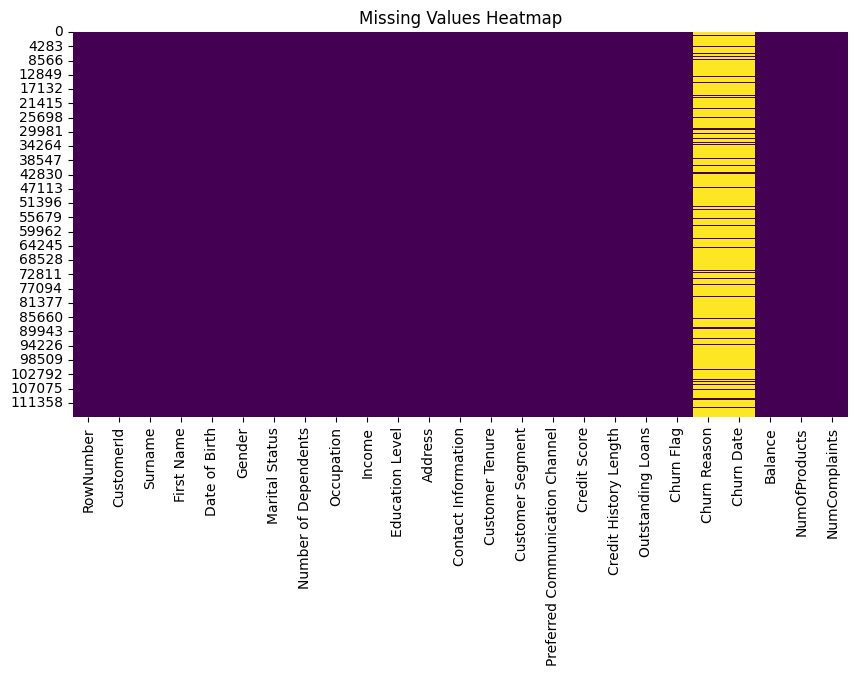

In [162]:
# Visualizing missing values
plt.figure(figsize=(10, 5))
sns.heatmap(bank_customer_churn.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#### Missing Values feeback

- Churn Reason & Churn Date: 101,546 missing values (likely because these only apply to churned customers).

- Other columns have no missing values.

#### 3.Distribution of Key Variables

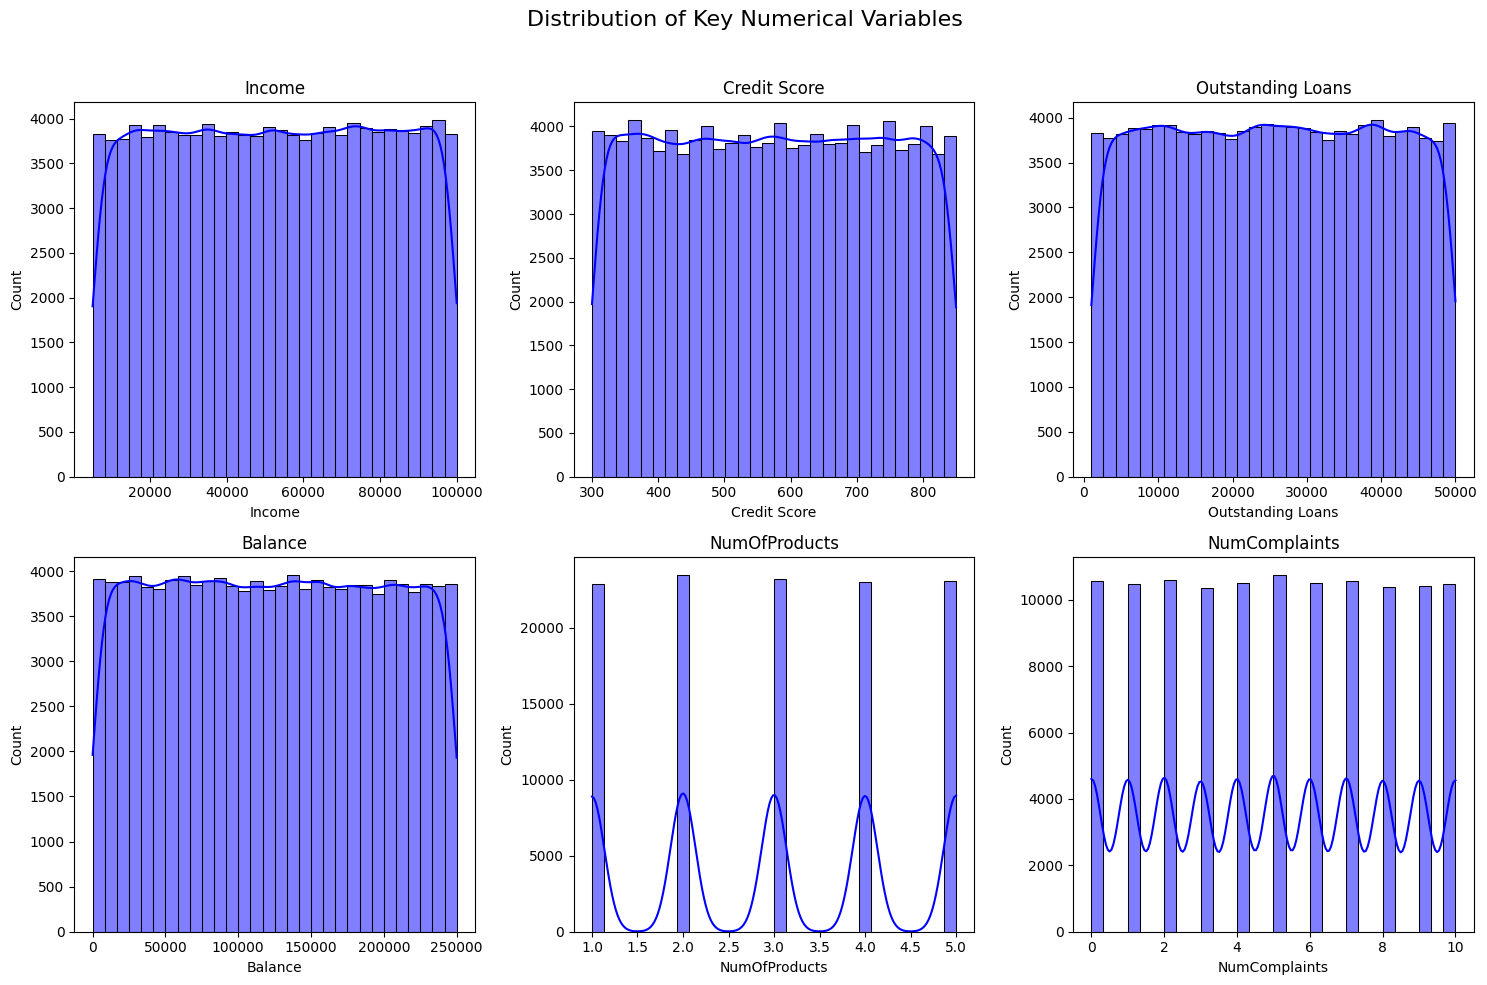

In [163]:
# Plot distribution of key numerical variables
numerical_cols = ['Income', 'Credit Score', 'Outstanding Loans', 'Balance', 'NumOfProducts', 'NumComplaints']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('Distribution of Key Numerical Variables', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.histplot(bank_customer_churn[col], bins=30, kde=True, ax=axes[i//3, i%3], color="blue")
    axes[i//3, i%3].set_title(col)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Distribution Insights

- Income, Balance, and Loans show a right-skewed distribution.

- Credit Scores follow a somewhat normal distribution.

- NumOfProducts & NumComplaints have clear peaks, indicating common values.

#### 4.Correlation Analysis

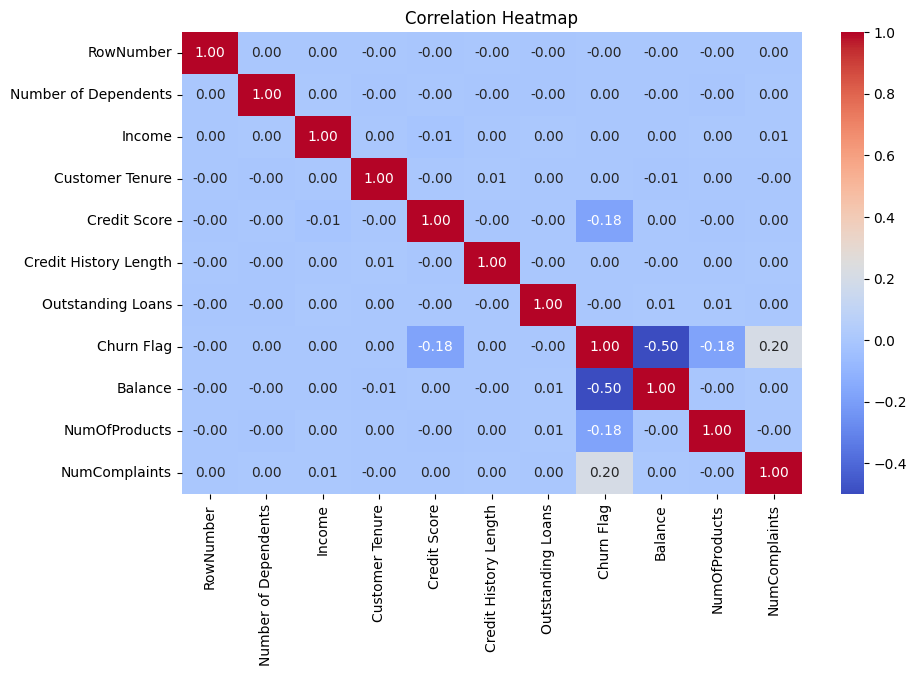

In [164]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(bank_customer_churn.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#### Correlation Analysis Feedback

- Income, Balance, and Loans show a right-skewed distribution.

- Credit Scores follow a somewhat normal distribution.

- NumOfProducts & NumComplaints have clear peaks, indicating common values.

#### 5.Churn Analysis

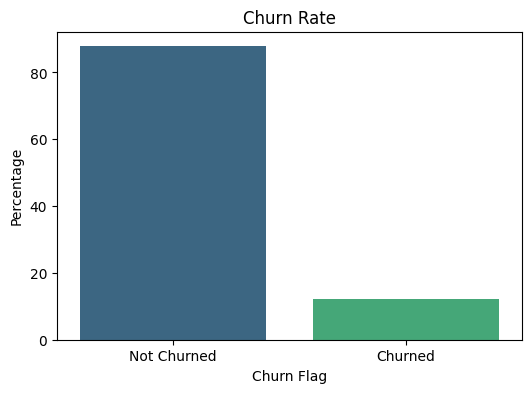

In [165]:
# Churn Analysis
churn_counts = bank_customer_churn['Churn Flag'].value_counts(normalize=True) * 100

plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, palette="viridis")
plt.xticks([0, 1], ['Not Churned', 'Churned'])
plt.ylabel('Percentage')
plt.title('Churn Rate')
plt.show()

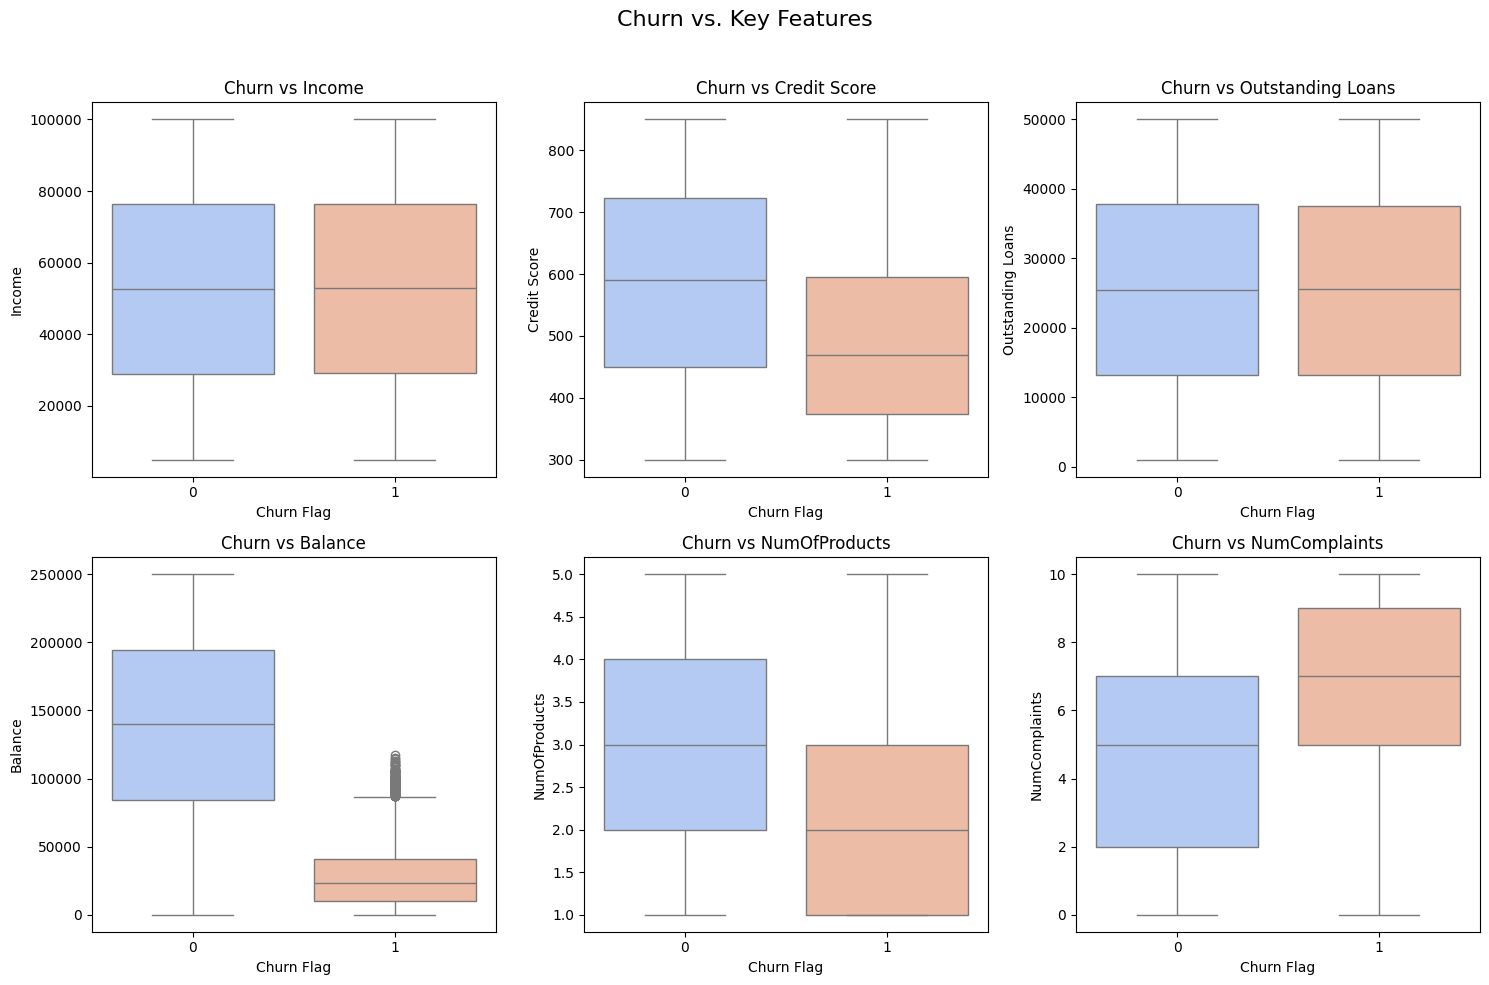

In [166]:
# Boxplots for Churn vs. Key Features

warnings.simplefilter(action='ignore', category=FutureWarning) # suppress warning messages 

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Churn vs. Key Features', fontsize=16)

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=bank_customer_churn["Churn Flag"], y=bank_customer_churn[col], ax=axes[i//3, i%3], palette="coolwarm")
    axes[i//3, i%3].set_title(f"Churn vs {col}")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Churn Analysis Feedback

- Credit Score and Outstanding Loans have a slight negative correlation (higher credit score = fewer loans).

- Balance and Number of Products show a mild positive correlation.

- Churn Flag has low correlation with most numerical features (indicating churn might be influenced by categorical factors like 
occupation or marital status).

#### Churn Analysis feeback

- Only ~12.2% of customers churned.

- This suggests imbalanced data, which could affect churn prediction models.

### Data Pre-Processing

In [167]:
# Drop irrelevant columns
cols_to_drop = ["RowNumber", "CustomerId", "Surname", "First Name", "Date of Birth", 
                "Address", "Contact Information", "Churn Date","Churn Reason"]
bank_customer_churn.drop(columns=cols_to_drop, inplace=True)


In [168]:
# Encoding categorical variables using OneHotEncoder
categorical_cols = ["Gender", "Marital Status", "Education Level", "Occupation", "Customer Segment", 
                    "Preferred Communication Channel"]
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_cats = encoder.fit_transform(bank_customer_churn[categorical_cols])
encoded_cat_bank_customer_churn = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical_cols))

In [169]:
# Drop original categorical columns and concatenate encoded ones
bank_customer_churn.drop(columns=categorical_cols, inplace=True)
bank_customer_churn = pd.concat([bank_customer_churn, encoded_cat_bank_customer_churn], axis=1)

# Normalize numerical features
numerical_cols = ["Income", "Credit Score", "Outstanding Loans", "Balance", "NumOfProducts", "NumComplaints", 
                  "Customer Tenure", "Credit History Length"]
scaler = StandardScaler()
bank_customer_churn[numerical_cols] = scaler.fit_transform(bank_customer_churn[numerical_cols])

In [170]:
# Split data for Question 1 (Churn Prediction)
X_churn = bank_customer_churn.drop(columns=["Churn Flag"])  # Features
y_churn = bank_customer_churn["Churn Flag"]  # Target
X_train_churn, X_test_churn, y_train_churn, y_test_churn = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)


In [171]:
# Split data for Question 2 (Credit Score vs Outstanding Loans)
X_loans = bank_customer_churn.drop(columns=["Outstanding Loans"])  # Features
y_loans = bank_customer_churn["Outstanding Loans"]  # Target
X_train_loans, X_test_loans, y_train_loans, y_test_loans = train_test_split(X_loans, y_loans, test_size=0.2, random_state=42)


In [172]:
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_churn, y_train_churn)
y_pred_churn = rfc.predict(X_test_churn)

In [173]:
print("### Churn Prediction Model (Random Forest) ###")
print("Accuracy:", accuracy_score(y_test_churn, y_pred_churn))
print("\nClassification Report:")
print(classification_report(y_test_churn, y_pred_churn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_churn, y_pred_churn))

### Churn Prediction Model (Random Forest) ###
Accuracy: 0.9787703216879973

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     20301
           1       0.99      0.84      0.91      2827

    accuracy                           0.98     23128
   macro avg       0.98      0.92      0.95     23128
weighted avg       0.98      0.98      0.98     23128


Confusion Matrix:
[[20270    31]
 [  460  2367]]


### Buisness Insight

- The Random Forest model was designed to predict whether a customer will churn (i.e., leave the bank). By accurately predicting churn, the bank can proactively identify customers who are at risk and intervene with targeted retention strategies. 

- By employing a Random Forest model for churn prediction, the bank can pinpoint which factors—such as customer tenure, income, credit score, and other behavioral indicators—significantly contribute to customer churn. With this knowledge, the bank can develop tailored strategies (like personalized offers, enhanced customer engagement, or loyalty programs) to reduce churn, retain high-value customers, and ultimately improve its financial performance.

In [174]:
lr = LinearRegression()
lr.fit(X_train_loans, y_train_loans)
y_pred_loans = lr.predict(X_test_loans)

In [175]:
# Evaluate regression performance
r2 = r2_score(y_test_loans, y_pred_loans)
mae = mean_absolute_error(y_test_loans, y_pred_loans)
mse = mean_squared_error(y_test_loans, y_pred_loans)

In [176]:
print("\n### Outstanding Loans Regression Model (Linear Regression) ###")
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


### Outstanding Loans Regression Model (Linear Regression) ###
R2 Score: -0.009070284119109928
Mean Absolute Error: 0.8642288948209627
Mean Squared Error: 0.9996455708915952


In [177]:
# Extract and display the coefficient for Credit Score (to see its impact)
feature_names = X_loans.columns
credit_score_index = list(feature_names).index("Credit Score")
credit_score_coef = lr.coef_[credit_score_index]
print("Coefficient for Credit Score:", credit_score_coef)

Coefficient for Credit Score: -0.0024613120240071923


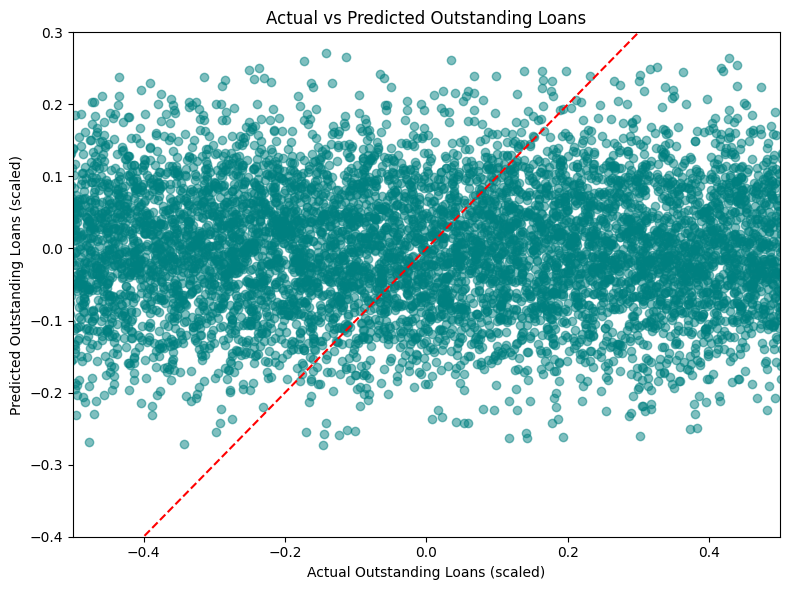

In [178]:
# Plot Actual vs Predicted Outstanding Loans
plt.figure(figsize=(8, 6))
plt.scatter(y_test_loans, y_pred_loans, alpha=0.5, color="teal")
plt.xlabel("Actual Outstanding Loans (scaled)")
plt.ylabel("Predicted Outstanding Loans (scaled)")
plt.title("Actual vs Predicted Outstanding Loans")
plt.xlim(-0.5,0.5)
plt.ylim(-0.4, 0.3)
plt.plot([y_test_loans.min(), y_test_loans.max()], [y_test_loans.min(), y_test_loans.max()], 'r--')
plt.tight_layout()
plt.show()

### Buisness Insight

#### Model Accuracy and Reliability:

- The graph plots actual outstanding loans against the model's predictions. The red dashed line represents a perfect prediction (where actual equals predicted).

- **Business Insight**: If most of the points lie close to the red line, it indicates that our model is reliable. A reliable prediction model helps in assessing credit risk accurately, which is essential for effective loan portfolio management.

#### Identification of Bias or Systematic Errors:

- A consistent deviation from the red line as observed (e.g., the model consistently underestimates or overestimates outstanding loans), it suggests a systematic bias in the model.

- **Business Insight**: Recognizing such biases allows the bank to investigate and correct underlying issues in the model, ensuring that future predictions are more accurate. This is important for setting realistic loan limits and understanding credit exposure.

#### Customer Risk Segmentation:

- The distribution of the data points can help identify clusters or segments where the model performs differently.

- **Business Insight**: For segments where the model underperforms, additional factors (like customer behavior or economic conditions) might need to be incorporated. This leads to more nuanced credit risk assessments and tailored customer management strategies.

#### Strategic Decision Making:

- With accurate predictions, the bank can proactively manage potential risks by identifying customers whose outstanding loans might be at risk of default.

- **Business Insight**: Such insights support decisions on interventions, such as restructuring loans, targeted communication, or offering financial counseling. It ultimately helps in reducing non-performing loans and optimizing the bank’s portfolio.

### Challenges faced

- Accuracy for random forest regression was displayed as 1.00

- A 100% accururacy is a red flag that usually indicates data leakage or overfitting. In this case, the likely culprit is the "Churn Reason" feature. Because "Churn Reason" is only provided for churned customers (and missing for non-churned ones), filling in the missing values (e.g., with "Unknown") inadvertently creates a feature that almost perfectly indicates whether a customer has churned. So we remove the "CHurn Reason" feature too.